<div style="background-color:#33001a; border-radius:15px; padding:20px; text-align:left; color:white; box-shadow:0 4px 12px rgba(0,0,0,0.5); font-family:Arial, sans-serif;">
  <h2 style="color:#ff4da6;">🎗️ Breast Cancer Dataset Analysis</h2>
  <ul style="line-height:1.8;">
    <li>📊 Contains features such as <strong>mean radius</strong>, <strong>texture</strong>, <strong>perimeter</strong>, <strong>area</strong>, and more.</li>
    <li>🏷️ Target variable: <strong>Malignant</strong> (cancerous) vs <strong>Benign</strong> (non-cancerous).</li>
    <li>🧽 Applied preprocessing: normalization, handling missing values, and encoding categorical features.</li>
    <li>🧠 Feature selection performed using <em>correlation matrix</em> and <em>mutual information</em>.</li>
    <li>🤖 Data prepared for modeling with algorithms like <strong>Logistic Regression</strong>, <strong>Random Forest</strong>, and <strong>SVM</strong>.</li>
    <li>✅ Goal: build an accurate and interpretable model to assist in early cancer detection.</li>
  </ul>
</div>


<div style="background-color:#001f33; border-radius:15px; padding:20px; text-align:left; color:white; box-shadow:0 4px 12px rgba(0,0,0,0.5); font-family:Arial, sans-serif;">
  <h2 style="color:#4da6ff;">📚 Step 1: Import Required Libraries</h2>
  <p>In this step, we will import the essential Python libraries used for data analysis and visualization:</p>
  <ul style="line-height:1.8;">
    <li>🐼 <strong>pandas</strong> → Data manipulation & analysis</li>
    <li>🔢 <strong>numpy</strong> → Numerical operations</li>
    <li>📊 <strong>matplotlib / seaborn</strong> → Visualization</li>
    <li>🤖 <strong>sklearn</strong> → Machine learning tools</li>
  </ul>
</div>


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for Eda
import seaborn as sns #for EDA
from sklearn.model_selection import train_test_split #split x,y data to train model
from sklearn.linear_model import LogisticRegression #model 
from sklearn.ensemble import RandomForestClassifier #model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")


# 📂 Step 2: Load the Dataset

Now, we will read the dataset into a pandas DataFrame for exploration and analysis.

- Ensure the file path is correct (local/online).  
- The dataset will be our main source for all visualizations and model training.  


In [5]:
#read data
df = pd.read_csv(r'D:\deploy breast cancer\Breast_cancer_dataset.csv')

#show data 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Handling 

# 🔎Exploratory Data Analysis (EDA)



In [6]:
#show missing value in data
print(f"Missing Value = {df.isnull().sum()}")

#show duplicated value
print(f'Duplicated = {df.duplicated().sum()}')

#the shape of data
print (f'Shape = {df.shape}')



Missing Value = id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [7]:
#describe data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
#data info to know numerical and categorical values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


In [10]:
#delete unused in data
df.drop(['Unnamed: 32','id'], axis=1, inplace=True)


# 📊 Data Visualization

Data visualization helps us understand distributions and relationships:
- **Histograms** for numerical columns  
- **Pie/Bar charts** for categorical columns  
- **Boxplots** to detect outliers  


## Numerical Analysis 

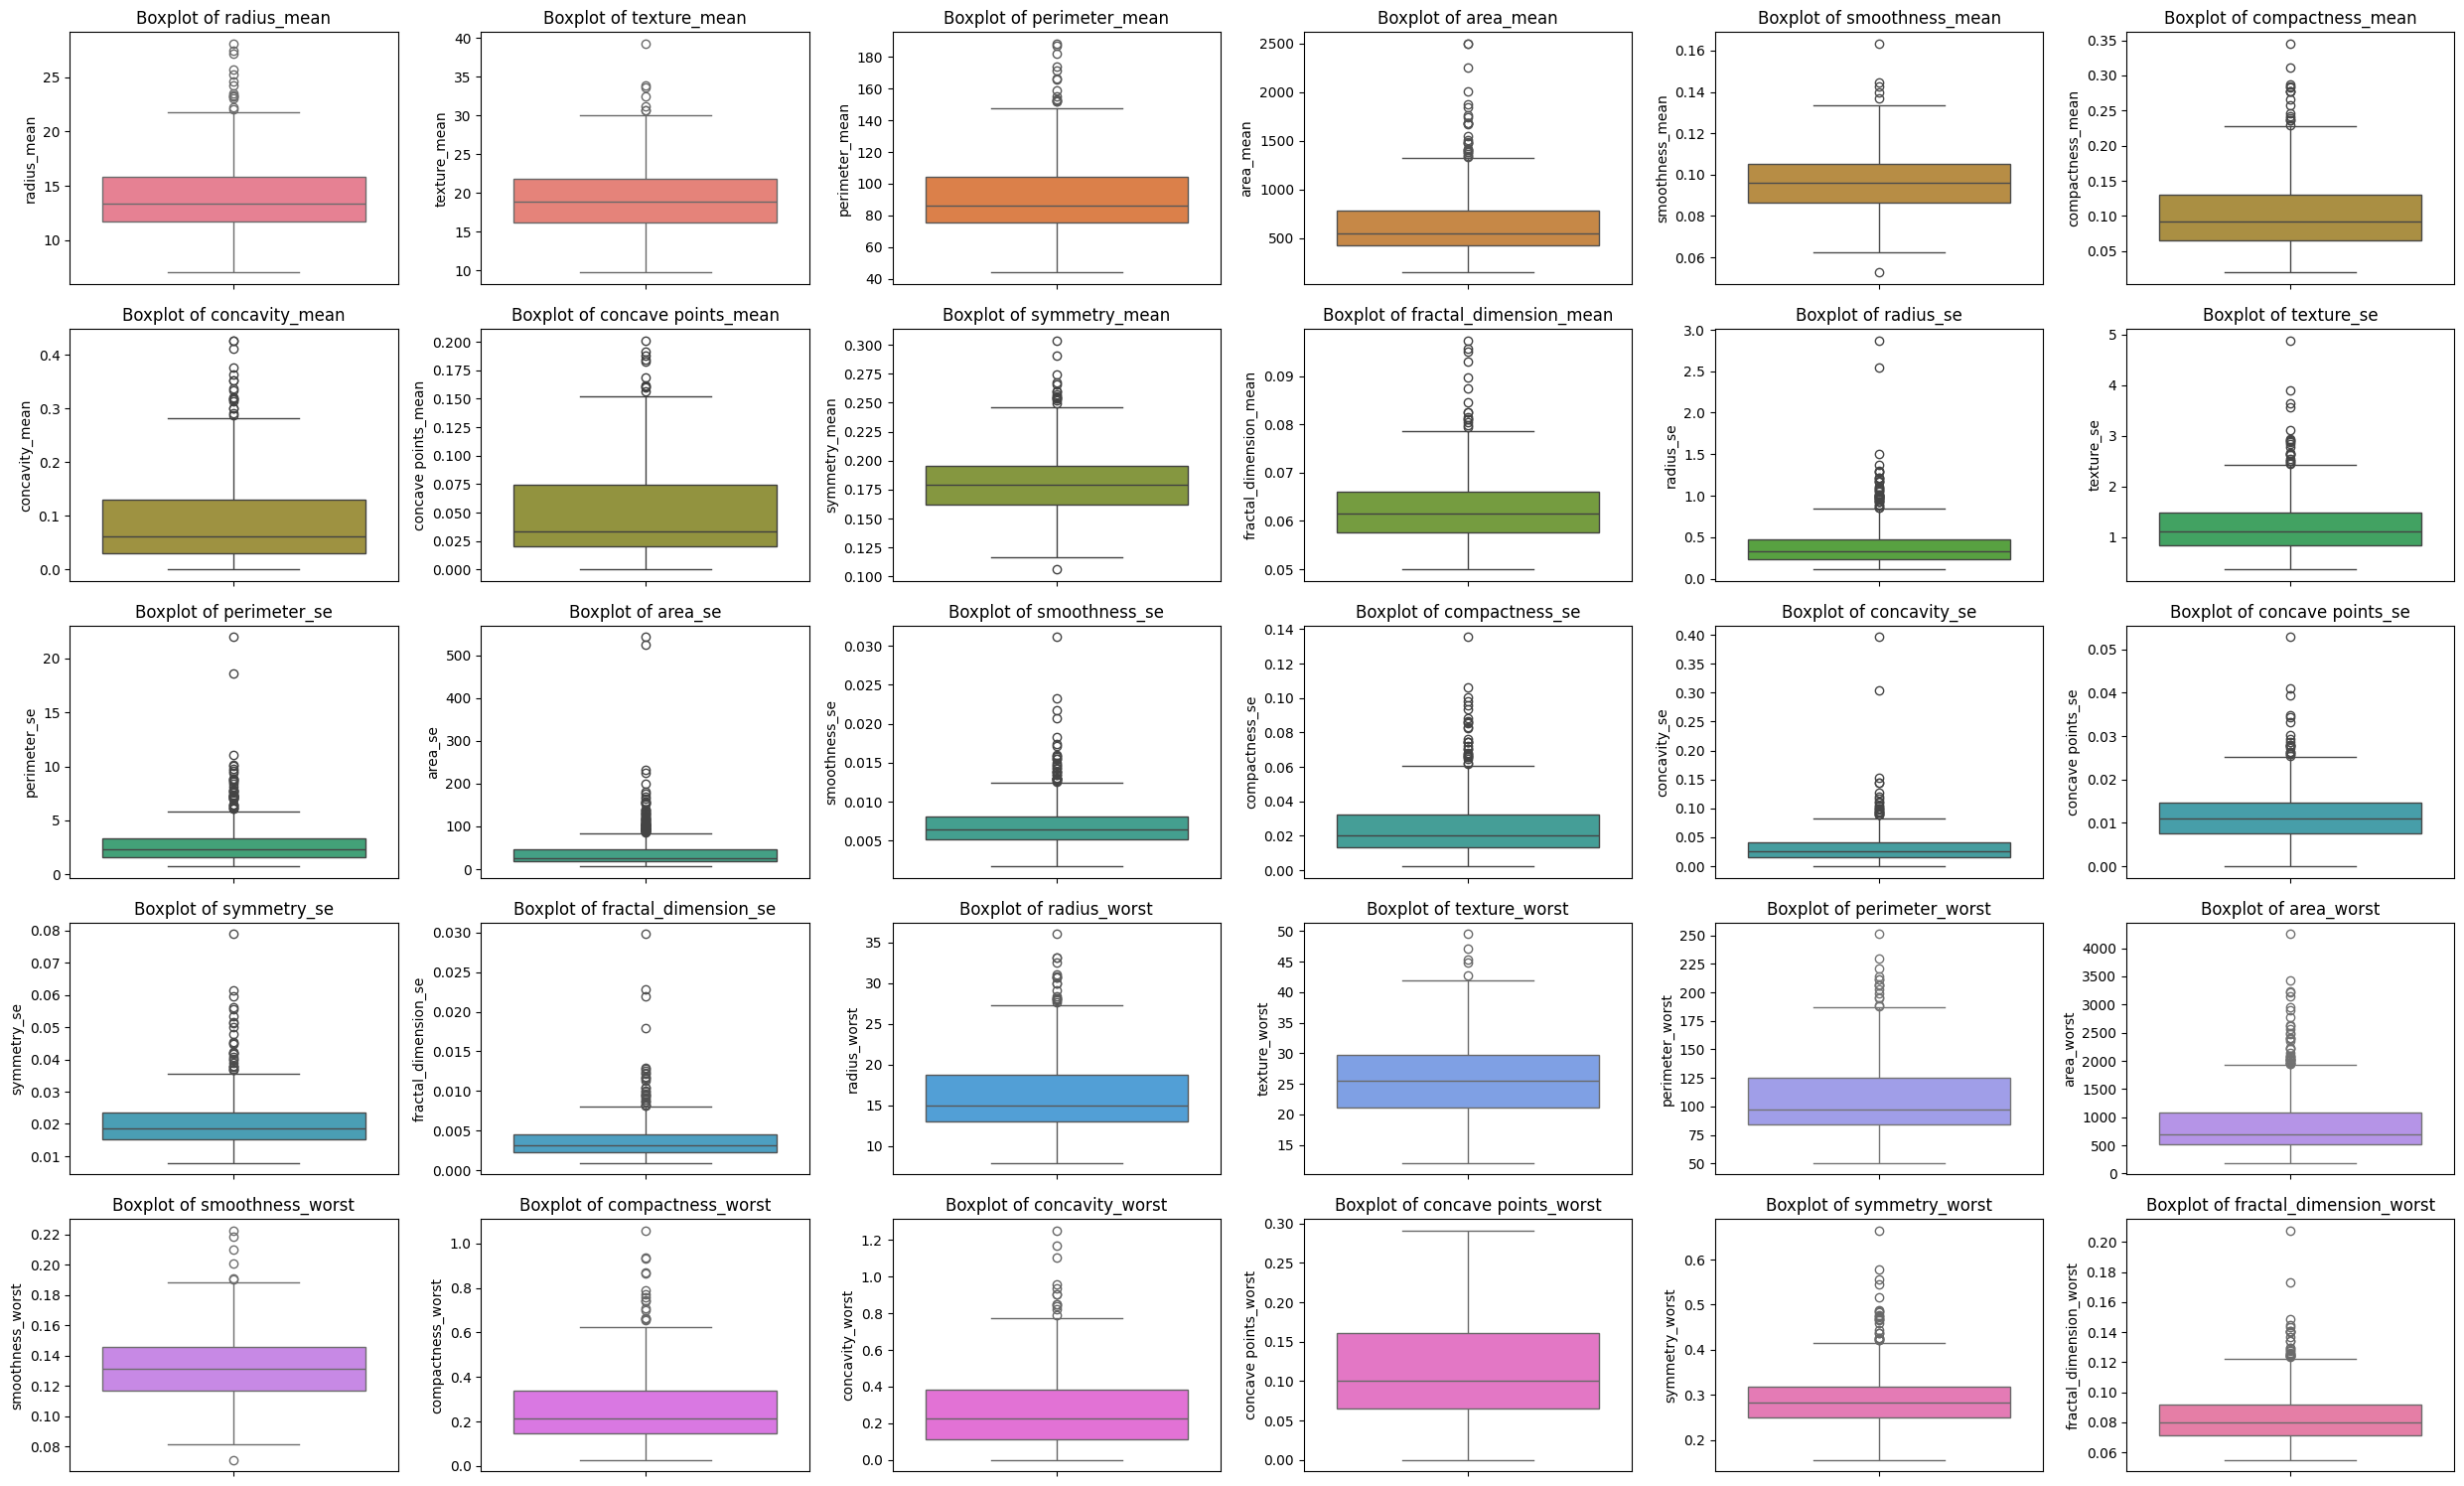

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define color palette
palette = sns.color_palette("husl", len(numerical_cols))

#to show Outliers in data 
plt.figure(figsize=(25, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

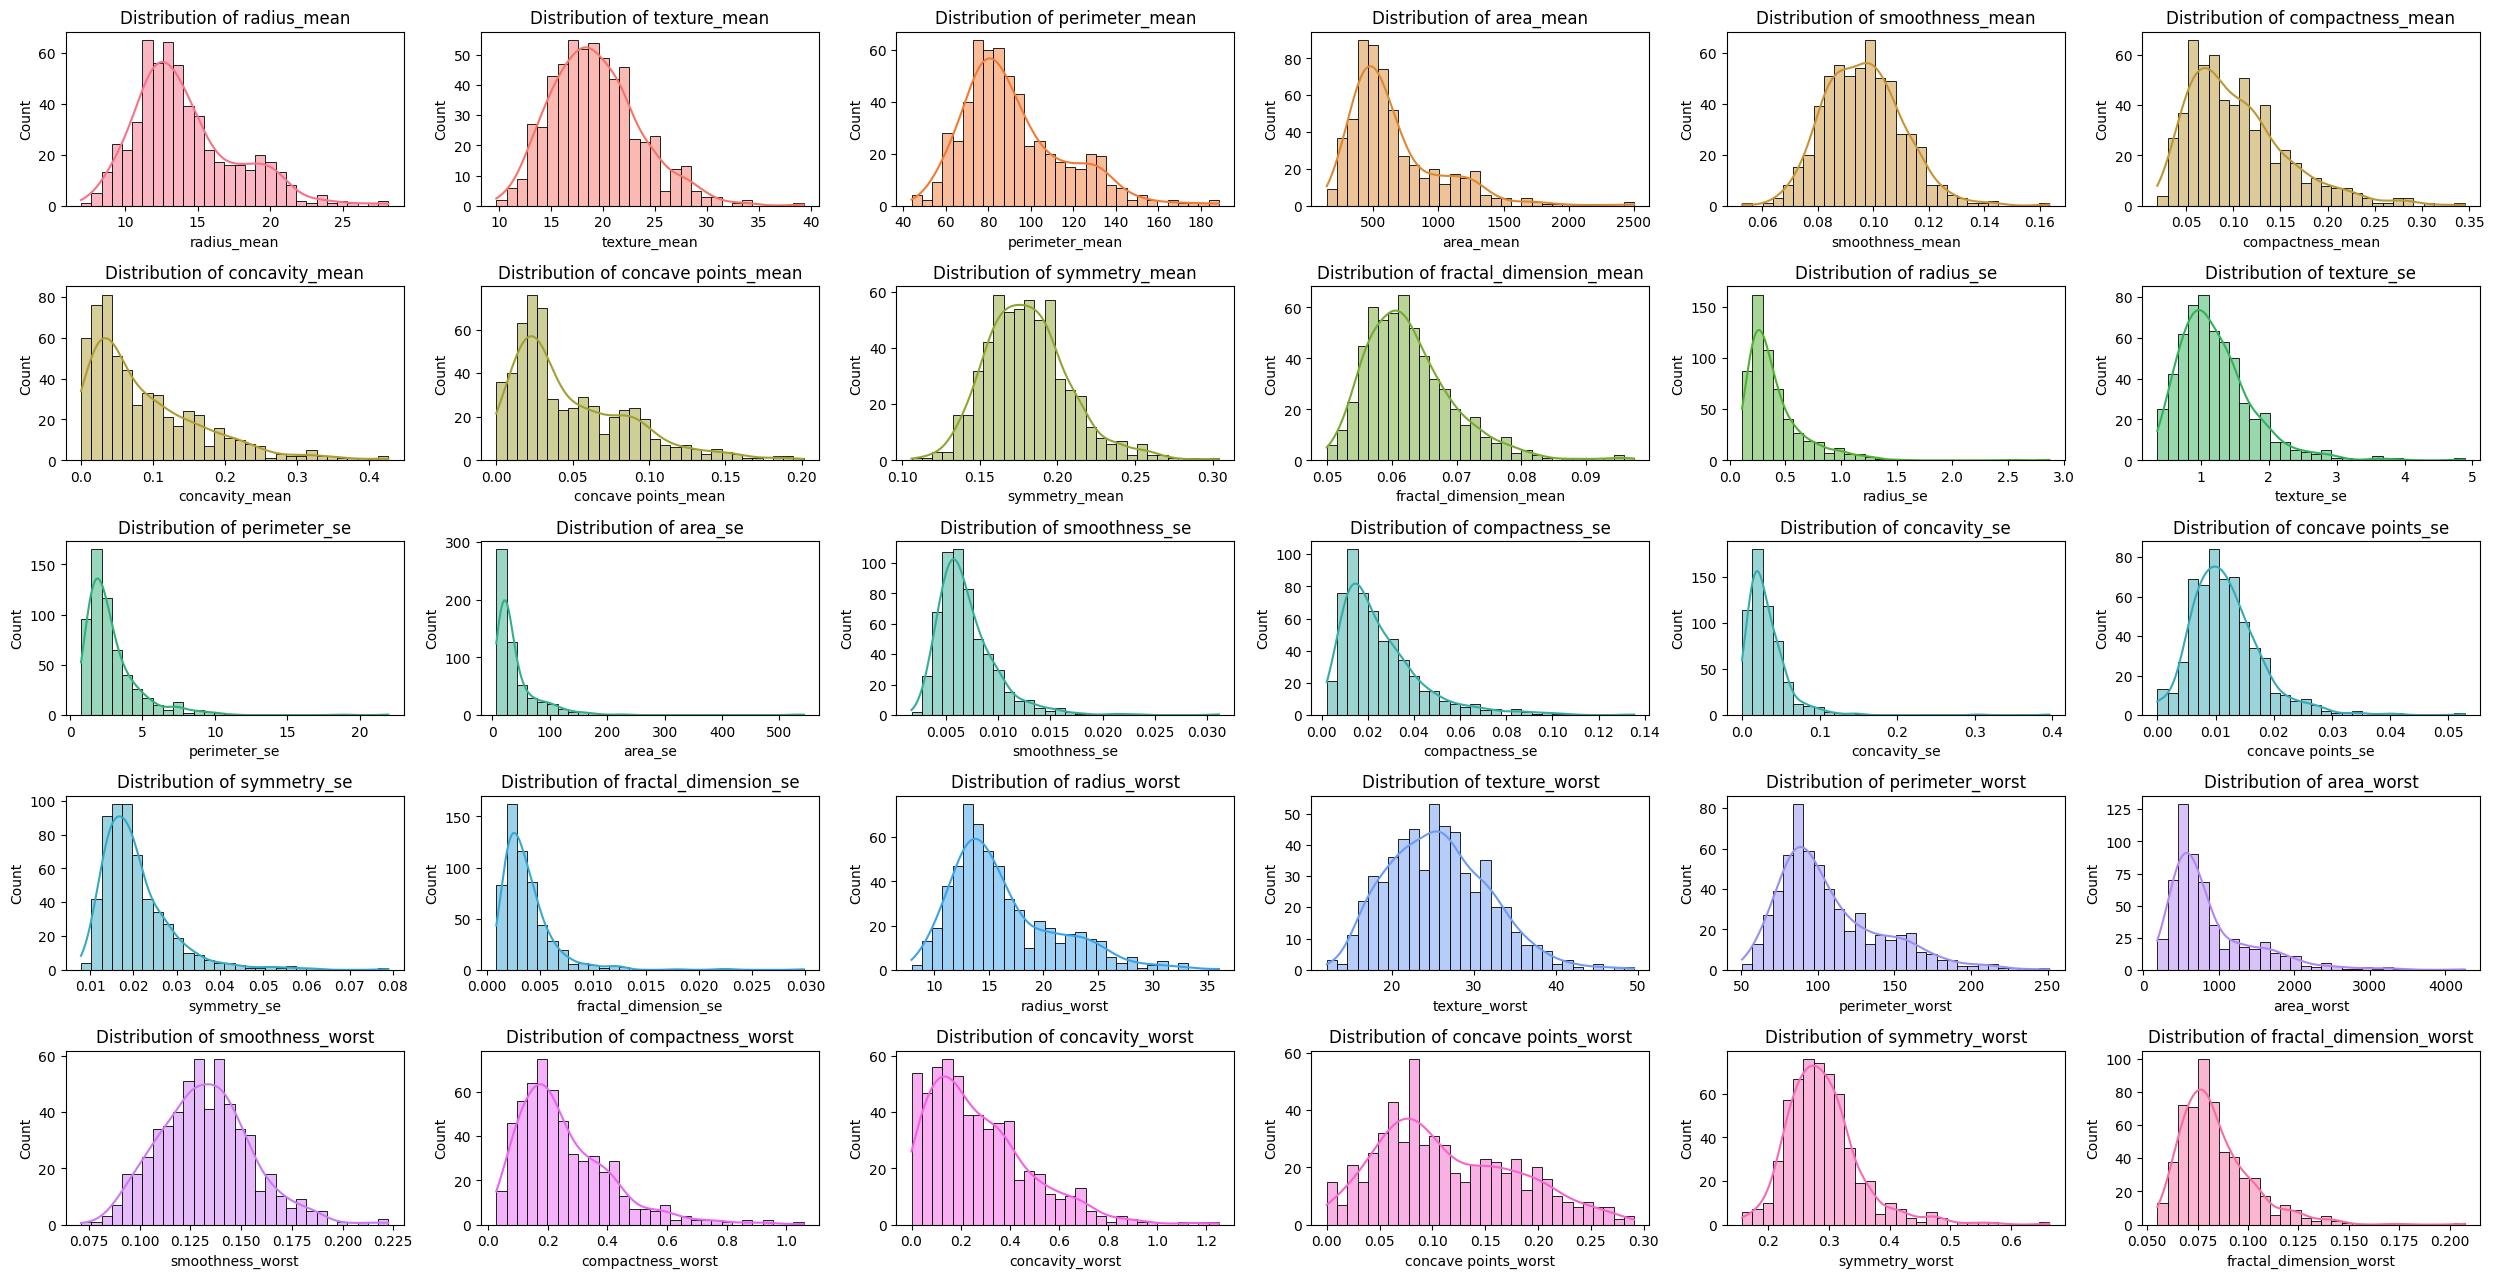

In [12]:
# Define color palette
palette = sns.color_palette("husl", len(numerical_cols))

#to show Distribution
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Features Analyzed: The histograms cover a range of mean, standard error (SE), and worst (largest) values for features such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

## Categorical Analysis

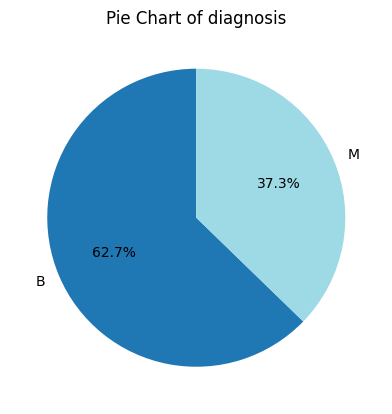

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

## Advanced Analysis

In [14]:
import math

def plot_histograms_by_target(df, target='diagnosis', exclude_cols=None, bins=30, cols_per_row=3):
    if exclude_cols is None:
        exclude_cols = []

    
    num_cols = [col for col in df.select_dtypes(include='number').columns if col not in exclude_cols + [target]]
    n = len(num_cols)

    
    nrows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(nrows, cols_per_row, figsize=(6 * cols_per_row, 4 * nrows))

   
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, hue=target, bins=bins, stat="density", element="step", ax=axes[i])
        axes[i].set_title(f'{col} by {target}')

    
    for j in range(i+1, len(axes)):
        axes[j].remove()

    plt.tight_layout()
    plt.show()


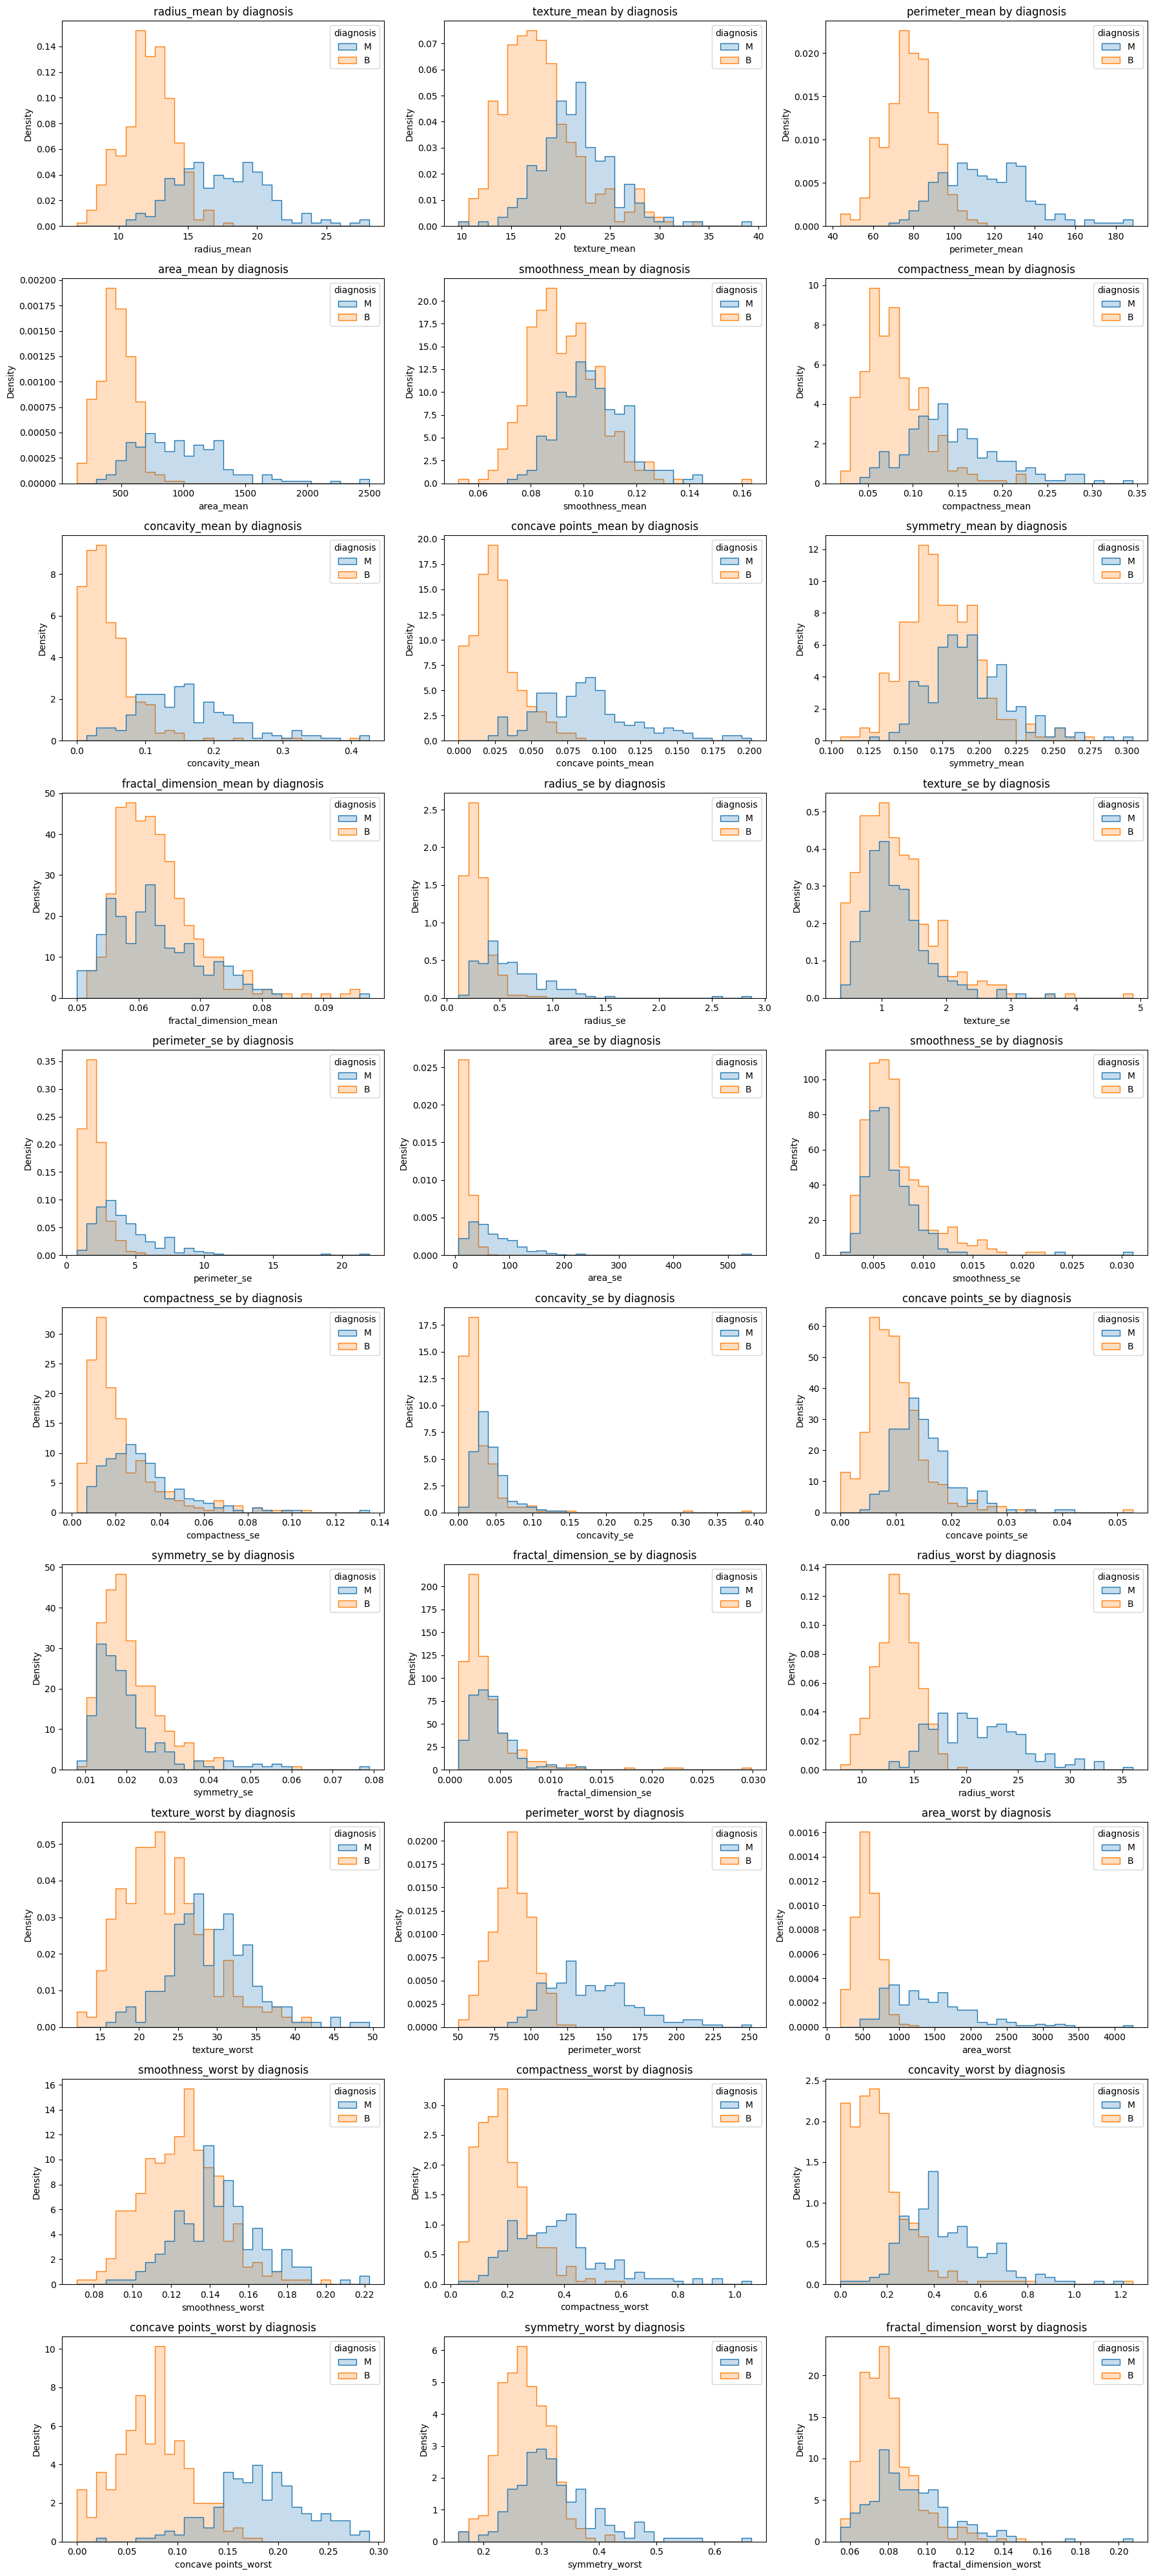

In [15]:
plot_histograms_by_target(df, target='diagnosis', exclude_cols=['id'])


## Get the Important Feature to Train the model

In [16]:
feature= df[['radius_mean','radius_se','concave points_mean','concave points_worst','texture_worst','compactness_worst','smoothness_worst','fractal_dimension_se','diagnosis']]


## Label Encoding

In [17]:
#convert categorical to Numerical 
feature = feature.copy()
feature.loc[:, 'diagnosis'] = feature['diagnosis'].map({'M': 1, 'B': 0})

## Use Scaling to normalize Outliers

In [18]:
# ⚖️ Scale Numerical Columns using RobustScaler
from sklearn.preprocessing import RobustScaler

def scale_numerical_columns(df, target_col, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

 
    numeric_cols = df.select_dtypes(include='number').columns.difference([target_col] + exclude_cols)

    scaler = RobustScaler()

    scaled = df.copy()
    scaled[numeric_cols] = scaler.fit_transform(scaled[numeric_cols])

    return scaled


scaled = scale_numerical_columns(feature, target_col='diagnosis')


In [19]:
#show after scaled
scaled.head()

,radius_mean,radius_se,concave points_mean,concave points_worst,texture_worst,compactness_worst,smoothness_worst,fractal_dimension_se,diagnosis
0,1.132353,3.126978,2.115850,1.715248,-0.935185,2.364252,1.051020,1.301299,1
1,1.764706,0.889655,0.682995,0.892194,-0.231481,-0.131839,-0.255102,0.149351,1
2,1.549020,1.709533,1.758242,1.483052,0.013889,1.107869,0.445578,0.599134,1
3,-0.477941,0.695335,1.335444,1.633358,0.126157,3.410109,2.670068,2.606494,1
4,1.696078,1.756592,1.318681,0.648595,-1.011574,-0.035956,0.207483,0.834632,1


## Train test split 

In [20]:
# Separate features and target
X = scaled.drop(columns=['diagnosis'])  
y = scaled['diagnosis']

# Split into train and test (e.g. 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Data Modeling

In [21]:
#RandomForest model
# Initialize models
rf = RandomForestClassifier(random_state=42)
# Convert target variables to integer type
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')


In [22]:
# Train models
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
# Predictions
rf_pred = rf.predict(X_test)

In [24]:
# Evaluation
print("Random Forest:\n", classification_report(y_test, rf_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



<!-- 🔧 Bulldozer Verification: ROC & AUC -->
<div style="
  font-family: 'Inter', Arial, sans-serif;
  background: radial-gradient(1200px 600px at 10% 10%, #0a2342 0%, #061626 45%, #030b14 100%);
  color: #e8f1ff;
  border: 1px solid rgba(255,255,255,0.08);
  border-radius: 16px;
  padding: 22px 22px 18px;
  box-shadow: 0 10px 30px rgba(0,0,0,0.35);
  ">
  
  <div style="display:flex; align-items:center; gap:12px; margin-bottom:10px;">
    <div style="width:12px; height:12px; background:linear-gradient(135deg,#5ac8fa,#34d1bf); border-radius:50%;"></div>
    <h2 style="margin:0; font-size:22px; letter-spacing:.2px; color:#9bd3ff;">Bulldozer Verification</h2>
  </div>

  <p style="margin:8px 0 14px; color:#c8d9f0; line-height:1.65; font-size:14.8px;">
    <strong>ROC Curve</strong> and <strong>AUC</strong> evaluate the quality of the prediction classifier. 
    <em>ROC</em> shows the comparison between <span style="color:#9cf2e3;">True Positive Rate</span> and 
    <span style="color:#ffd479;">False Positive Rate</span> across all thresholds. 
    An AUC value closer to <strong>1.0</strong> means better performance. 
    This is especially important if you have <strong>Class Imbalance</strong>.
  </p>

  <div style="
    display:grid; grid-template-columns: 1fr 1fr; gap:14px; 
    background: rgba(255,255,255,0.02); border:1px solid rgba(255,255,255,0.06);
    padding:14px; border-radius:12px;">

</div>


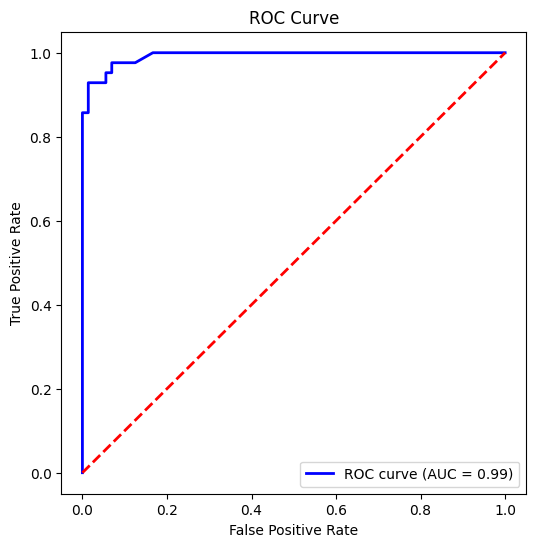

In [25]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## import randam Data to predict model

In [26]:

#Select columns (features + target)
feature_columns = [
    'radius_mean', 'radius_se', 'concave points_mean', 
    'concave points_worst', 'texture_worst', 'compactness_worst', 
    'smoothness_worst', 'fractal_dimension_se'
]

target_col = 'diagnosis'  # target

random_data = {
    'radius_mean': np.random.uniform(5, 30),
    'radius_se': np.random.uniform(0.1, 3),
    'concave points_mean': np.random.uniform(0.0, 0.3),
    'concave points_worst': np.random.uniform(0.0, 0.5),
    'texture_worst': np.random.uniform(10, 40),
    'compactness_worst': np.random.uniform(0.0, 1.0),
    'smoothness_worst': np.random.uniform(0.05, 0.2),
    'fractal_dimension_se': np.random.uniform(0.001, 0.1)
}

# We create a DataFrame in the same order
random_df = pd.DataFrame([random_data])[feature_columns]

# predict model
prediction = rf.predict(random_df)


if hasattr(rf, "predict_proba"):
    proba = rf.predict_proba(random_df)
    print("Predicted class:", prediction[0])
    print("Prediction probabilities:", proba[0])
else:
    print("Prediction:", prediction[0])

print("\nRandom input data:")
print(random_df)


Predicted class: 1
Prediction probabilities: [0.29 0.71]

Random input data:
   radius_mean  radius_se  concave points_mean  concave points_worst  \
0    22.284569   1.244062             0.218258              0.073247   

   texture_worst  compactness_worst  smoothness_worst  fractal_dimension_se  
0      18.108214           0.794544          0.158726              0.046831  


Probability of having diabetes: 71.00%


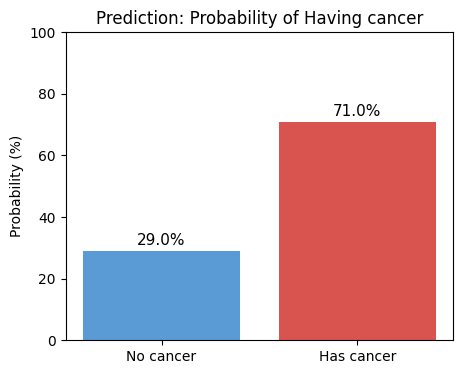

In [27]:
# check if the model 
if hasattr(rf, "predict_proba"):
    proba = rf.predict_proba(random_df)[0]  # [No, Yes]
    
    # Possibility of developing diabetes
    sugar_percent = proba[1] * 100
    print(f"Probability of having diabetes: {sugar_percent:.2f}%")
    
    # bar chart
    labels = ['No cancer', 'Has cancer']
    values = [proba[0]*100, proba[1]*100]
    colors = ['#5b9bd5', '#d9534f']  #color

    plt.figure(figsize=(5,4))
    bars = plt.bar(labels, values, color=colors)
    plt.ylim(0, 100)
    plt.ylabel('Probability (%)')
    plt.title('Prediction: Probability of Having cancer')

    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", 
                 ha='center', va='bottom', fontsize=11)

    plt.show()
else:
    print("Model does not support probability prediction.")


In [29]:
import joblib

# Save the trained RandomForest model to a file
model_filename = "breast_cancer_rf_model.pkl"
joblib.dump(rf, model_filename)
print(f"Model saved to {model_filename}")


Model saved to breast_cancer_rf_model.pkl
